<a href="https://colab.research.google.com/github/Andysimps0n/DL_lecture/blob/main/MNIST_with_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q torch==1.0.0 torchvision
import torch
print(torch.__version__)

ERROR: Could not find a version that satisfies the requirement torch==1.0.0 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0, 2.7.0, 2.7.1, 2.8.0, 2.9.0, 2.9.1, 2.10.0)
ERROR: No matching distribution found for torch==1.0.0
2.9.0+cpu


In [24]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms

In [25]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn


batch_size = 128
train_dataset = datasets.MNIST('./data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
test_dataset =  datasets.MNIST('./data', train=False, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [50000, 10000])
print(len(train_dataset), len(val_dataset), len(test_dataset))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

50000 10000 10000


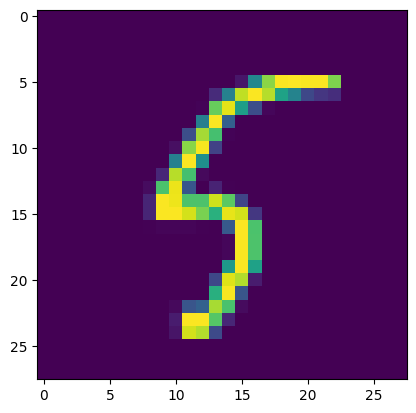

In [26]:

import matplotlib.pyplot as plt

example_data = train_dataset[0][0]

plt.imshow(example_data.squeeze())


In [29]:
class MLPModel(nn.Module):
  def __init__(self):
    super(MLPModel, self).__init__()
    self.linear1 = nn.Linear(784, 128)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(128, 10)

  def forward(self, x):
    x = x.view(-1, 784)

    x = self.linear1(x)
    x = self.relu(x)
    x = self.linear2(x)



In [22]:
loss_function = nn.CrossEntropyLoss()

In [30]:
import torch.optim as optim
from sklearn.metrics import accuracy_score

model = MLPModel()
learning_rate = 0.005
optimizer = optim.Adam(model.parameters())

list_epoch = []
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []


epoch = 30
for i in range(epoch):
  train_loss = 0
  model.train()

  for input_X, true_y in train_loader:
    optimizer.zero_grad()


    input_X = input_X.squeeze()
    input_X = input_X.view(-1, 784)
    pred_y = model(input_X)
    loss = loss_function(pred_y.squeeze(), true_y)

    loss.backward()
    optimizer.step()

    train_loss += loss.detach().numpy()

  train_loss /= len(train_loader) #배치당 평균 손실
  list_train_loss.append(train_loss)
  list_epoch.append(i)


